<a href="https://colab.research.google.com/github/wf-yamaday/machine-learning/blob/master/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%81%AE%E6%95%99%E7%A7%91%E6%9B%B8/section5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 機械学習
## 教師あり学習・回帰
回帰とは，入力に対して連続した数値を対応づける問題のことを指す．
このノートでは，年齢xと身長tのデータセットで年齢xを入力変数に身長tを目標変数としてデータセットにない年齢xに対して身長tの予測を行う．

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# データ生成
np.random.seed(seed=1)
X_min = 4 #年齢の下限（表示用）
X_max = 30 # 年齢の上限（表示用）
X_n = 16 #データセットの数
X = 5 + 25 * np.random.rand(X_n)
Prm_c = [170,108,0.2]
T = Prm_c[0]-Prm_c[1]*np.exp(-Prm_c[2]*X)+ 4*np.random.randn(X_n) #A
np.savez('ch5_data.npz',X=X,X_min=X_min,X_max=X_max,X_n=X_n,T=T)

上のプログラムでは，16人分の年齢Xをランダムに決定している．
AによってXからTを決定している．
以下ではXの中身とTの中身を確認してみる．

In [7]:
# Xの中身の確認
print(X)
print(np.round(X,2))
# Tの中身の確認
print(np.round(T,2))

[15.42555012 23.00811234  5.00285937 12.55831432  8.66889727  7.30846487
  9.65650528 13.63901818 14.91918686 18.47041835 15.47986286 22.13048751
 10.11130624 26.95293591  5.68468983 21.76168775]
[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


これらXとTを散布図にプロットしてみる．

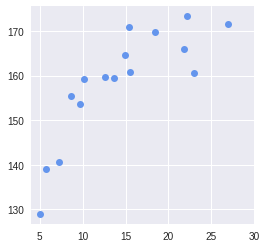

In [8]:
plt.figure(figsize=(4,4))
plt.plot(X,T,marker='o',linestyle='None',markeredgecolor='black',color='cornflowerblue')
plt.xlim(X_min,X_max)
plt.grid(True)
plt.show()

## 直線モデル
このデータセットから回帰直線を求める．  
$$ y(x)=w_0x+w_1$$
具体的にはデータセットから$w_0$と$w_1$の値を求めることを行う．  
そのためには**二乗誤差関数**を用いる．誤差Jは以下の式で定義する．
$$
J = \frac{1}{N}\sum_{n=0}^{N-1}{(y_n - t_n)^2}
$$
これは平均二乗誤差(mean squire error)と呼ばれる．